Task 1
Предположим, что вам нужно провести эксперимент. Вам заведомо известно, сколько людей в России оплачивают покупки картой. Но на будущее вы хотите понять, какой объём выборки оптимально использовать, чтобы не проводить полномасштабный опрос граждан, а опросить какое-то ограниченное количество людей и получить достаточно точную оценку этой же величины.

Известно, что 65% пользуются картой для оплаты покупок в магазинах. Население страны — 146 млн чел.

Создайте генеральную совокупность этих людей: 1 — если человек оплачивает картой; 0 — если оплачивает только наличными.
Сделайте 10 раз выборку из этой генеральной совокупности по 100 человек. Посчитайте долю оплачивающих картой в каждой выборке. Посчитайте среднюю этих долей. Сравните с реальным значением по генеральной совокупности — 65%.
Проделайте аналогичные вычисления, но для 1 000 человек в выборке.
Проделайте аналогичные вычисления, но для 10 000 человек в выборке.
Напишите функцию, которая на вход будет принимать объём выборки и количество раз, которое нужно этот объём выборки получить, а на выход она будет печатать долю оплачивающих картой по каждой выборке и среднее значение доли по выборке.
Посчитайте 95% доверительные интервалы, взяв по одной выборке размера 100, 1 000 и 10 000 человек. Округлите границы интервала до 5 знаков после запятой. Оформите это в еще одну функцию.
Посчитайте 80% доверительные интервалы, взяв выборки того же размера.

In [33]:
import numpy as np
import random

In [34]:
zero = np.zeros(51100000) #Создаем 35% от выборки с 0
one = np.ones(94900000) #Создаем 65% от выборки с 1
data = np.concatenate((zero,one)) #Объединяем нули и единицы
np.random.shuffle(data) #Рандомно перемешиваем массив
data

array([1., 1., 1., ..., 0., 1., 1.])

In [35]:
from statistics import mean
def sampling(x,y): # Функция,где x - кол-во человек в выборке, у - кол-во выборок
    dd = [] # Создаем пустой массив
    i=1 # Указываем начальное значение
    for i in range(y): #Создаем цикл длиной y (кол-во выборок)
        x_samp = np.random.choice(data, size=x, replace=False, p=None) #Создаем выборку длиной х (кол-во человек в выборке)
        x_d = x_samp.mean() #Считаем среднее кол-во человек использующих карту в выборке (у кого есть 1)
        dd.append(x_d) #Добавляем среднее значение в массив
        i = i + 1 # Увеличиваем итератор на 1
    return print(dd , "\nСредняя доля в " , y ," выборках по ", x, "составляет :" , round(mean(dd)*100,1) ,"%") 

In [36]:
x = 100
y = 10
sampling(x,y)

[0.72, 0.67, 0.63, 0.65, 0.69, 0.7, 0.65, 0.63, 0.62, 0.64] 
Средняя доля в  10  выборках по  100 составляет : 66.0 %


In [37]:
x = 1000
y = 10
sampling(x,y)

[0.664, 0.676, 0.659, 0.654, 0.642, 0.673, 0.632, 0.648, 0.673, 0.67] 
Средняя доля в  10  выборках по  1000 составляет : 65.9 %


In [38]:
x = 10000
y = 10
sampling(x,y)

[0.6532, 0.6508, 0.6579, 0.648, 0.6581, 0.6581, 0.6409, 0.6427, 0.6394, 0.6469] 
Средняя доля в  10  выборках по  10000 составляет : 65.0 %


Чем больше выборка тем точнее данные.

In [15]:
from scipy import stats 
import numpy as np 
from numpy import sqrt 

def confidence_interval(x_x,alpha): # Функция,где x_x - кол-во человек в выборке, у - доверительный интервал
    data_x = np.random.choice(data, size=x_x, replace=False, p=None) #Создаем выборку из x_x человек
    mean, sigma = np.mean(data), np.std(data)  # Вычисляем среднее и стандартное отклонение
    conf_int = stats.norm.interval(alpha, loc=mean, scale=sigma/sqrt(x_x)) # Считаем доверительный интервал
    print("Доверительный интервал в ",alpha*100,"% на выборке из ",x_x," равен ",np.around(conf_int,5))

In [16]:
x_x = 100
alpha = 0.95
confidence_interval(x_x,alpha)

Доверительный интервал в  95.0 % на выборке из  100  равен  [0.55652 0.74348]


In [17]:
x_x = 1000
alpha = 0.95
confidence_interval(x_x,alpha)

Доверительный интервал в  95.0 % на выборке из  1000  равен  [0.62044 0.67956]


In [18]:
x_x = 10000
alpha = 0.95
confidence_interval(x_x,alpha)

Доверительный интервал в  95.0 % на выборке из  10000  равен  [0.64065 0.65935]


In [19]:
x_x = 100
alpha = 0.80
confidence_interval(x_x,alpha)

Доверительный интервал в  80.0 % на выборке из  100  равен  [0.58887 0.71113]


In [20]:
x_x = 1000
alpha = 0.80
confidence_interval(x_x,alpha)

Доверительный интервал в  80.0 % на выборке из  1000  равен  [0.63067 0.66933]


In [21]:
x_x = 10000
alpha = 0.80
confidence_interval(x_x,alpha)

Доверительный интервал в  80.0 % на выборке из  10000  равен  [0.64389 0.65611]


с увеличением количества человек в выборке интервалы становятся более точными, чем меньше доверительный интервал тем точнее результаты

Task 2
Известно, что в конкурирующем банке у клиентов средний остаток на текущем счете равен 30 000 руб., а среднее квадратическое отклонение — 12 000 руб. У какого процента клиентов можно ожидать, что остатки на текущем счете будут более 50 000 руб.? Округлите процент до двух знаков после запятой.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

y = scipy.stats.norm.cdf(x =50000,loc=30000,scale=12000) #Считаем стандартное нормально распределение
yy = round((1- y)*100,2) #Округляем до двух знаков после запятой
yy

4.78

Task 3
Вероятность того, что клиент воспользуется промокодом на скидку равна 0.5. Какова вероятность того, что среди 100 клиентов, совершивших покупку, будет 50 клиентов, которые воспользовались промокодом, и 50 клиентов, которые не воспользовались промокодом? Округлите вероятность до 5 знаков после запятой.

In [23]:
import math
n = 100 
p = 0.5 
k = 50 
p_x = round((math.factorial(n)/(math.factorial(k)*math.factorial(k)))*(p**n),5) #Вычисление по формуле выше
p_x

0.07959

Task 4
Вам нужно получить прогноз остатков на счёте каждого клиента через месяц. Для этого вы воспользуетесь линейной регрессией. В качестве признаков у вас всего два показателя. У вас уже посчитана матрица весов W: 49.9322, 100.8343, у вас есть матрица признаков X и есть вектор смещения b: 12359. Вам нужно получить y, используя только матричные операции.

In [24]:
import numpy as np
import matplotlib.pyplot as pit
from sklearn.linear_model import LinearRegression
x = np.array([[32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444, 45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806, 48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754],[31.70700585, 68.77759598, 62.5623823, 71.54663223, 87.23092513, 78.21151827, 79.64197305, 59.17148932, 75.3312423, 71.30087989, 55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216, 60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319]])
b = 12359
w0 = 49.9322
w1 = 100.8343
y = w0*x[0]+w1*x[1]+b # х содержит два вектора, поэтому используем индексы 
y = np.array(y)
y

array([17179.06734447, 21961.85861051, 21739.78016878, 21943.9177114 ,
       24141.47433184, 22998.77447682, 22996.6924778 , 20287.82952942,
       22356.96364812, 22172.51214411, 20189.49948874, 23389.59348101,
       20816.83452211, 22865.66702848, 23403.07572941, 20926.49716477,
       22948.73760846, 25189.01191769, 19562.30775647, 20032.38307474])

Task 5
Посчитайте матрицу ковариаций признаков X из предыдущего упражнения. Из матрицы ковариаций посчитайте матрицу корреляций. Напишите свой класс, в котором будет две функции: расчет матрицы ковариаций и расчет матрицы корреляций. Используйте для этого только матричные операции. Использовать напрямую методы библиотек — запрещено.

In [25]:
import numpy as np
import math
class matrices:
    def cov_matrix(x):
        cov_x = [[],[]] # Создаем пустую матрицу
        x0 = x[0].mean() # Считаем среднее первого вектора х
        x1 = x[1].mean() # Считаем среднее второго вектора х
        x_x0 = x[0] - x0 # Вычитаем среднее х из всего 1 ветора (получаем массив)
        x_x1 = x[1] - x1 # Вычитаем среднее х из всего 2 ветора (получаем массив)
        cov_x[0] = np.append(cov_x[0] ,np.sum(x_x0*x_x0)/(len(x_x0*x_x0)-1)) # Ковариация 1 ветора от 1 вектора
        cov_x[0] = np.append(cov_x[0] ,np.sum(x_x0*x_x1)/(len(x_x0*x_x1)-1)) # Ковариация 1 ветора от 2 вектора
        cov_x[1] = np.append(cov_x[1] ,np.sum(x_x1*x_x0)/(len(x_x1*x_x0)-1)) # Ковариация 2 ветора от 1 вектора
        cov_x[1] = np.append(cov_x[1] ,np.sum(x_x1*x_x1)/(len(x_x1*x_x1)-1)) # Ковариация 2 ветора от 2 вектора
        return cov_x # Возвращаем матрицу ковариаций
        
    def cor_matrix(x):
        corr_x = [[],[]] # Создаем пустую матрицу
        x0 = x[0].mean() # Считаем среднее первого вектора х
        x1 = x[1].mean() # Считаем среднее второго вектора х
        x_x0 = x[0] - x0 # Вычитаем среднее х из всего 1 ветора (получаем массив)
        x_x1 = x[1] - x1 # Вычитаем среднее х из всего 2 ветора (получаем массив)
        corr_x[0] = np.append(corr_x[0] ,cov_x[0][0]/math.sqrt((np.sum(x_x0*x_x0)/(len(x_x0*x_x0)-1))*(np.sum(x_x0*x_x0)/(len(x_x0*x_x0)-1))))
        corr_x[0] = np.append(corr_x[0] ,cov_x[0][1]/math.sqrt((np.sum(x_x0*x_x0)/(len(x_x0*x_x0)-1))*(np.sum(x_x1*x_x1)/(len(x_x1*x_x1)-1))))
        corr_x[1] = np.append(corr_x[1] ,cov_x[1][0]/math.sqrt((np.sum(x_x1*x_x1)/(len(x_x1*x_x1)-1))*(np.sum(x_x0*x_x0)/(len(x_x0*x_x0)-1)))) 
        corr_x[1] = np.append(corr_x[1] ,cov_x[1][1]/math.sqrt((np.sum(x_x1*x_x1)/(len(x_x1*x_x1)-1))*(np.sum(x_x1*x_x1)/(len(x_x1*x_x1)-1))))
        return corr_x

In [26]:
x = np.array([[32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444, 45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806, 48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754],[31.70700585, 68.77759598, 62.5623823, 71.54663223, 87.23092513, 78.21151827, 79.64197305, 59.17148932, 75.3312423, 71.30087989, 55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216, 60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319]])

cov_x = matrices.cov_matrix(x) #Запускаем функцию расчета ковариации
print("Матрица ковариации: \n", np.array(cov_x),"\n")

corr_x = matrices.cor_matrix(x) #Запускаем функцию расчета корреляции
print("Матрица корреляции: \n", np.array(corr_x))

Матрица ковариации: 
 [[ 61.84185688  87.89094375]
 [ 87.89094375 228.6795499 ]] 

Матрица корреляции: 
 [[1.         0.73907618]
 [0.73907618 1.        ]]


Task 6
Скачайте эту картинку.
Используя несколько кернелов из области Computer Vision, модифицируйте изображение через операцию свёртки. Кернелы представлены ниже:

In [27]:
pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Исходное изображение:



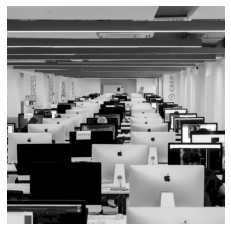

Изображение после наложения первого кернела:



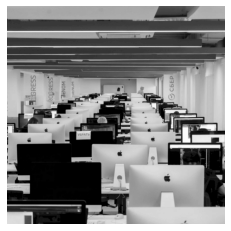

Изображение после наложения второго кернела:



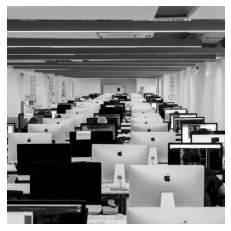

Изображение после наложения третьего кернела:



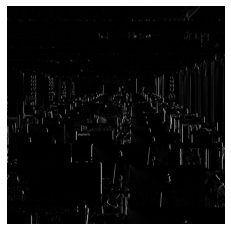

Изображение после наложения четвертого кернела:



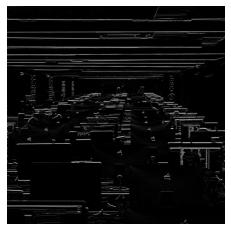

Изображение после наложения пятого кернела:



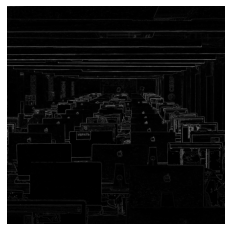

Изображение после наложения шестого кернела:



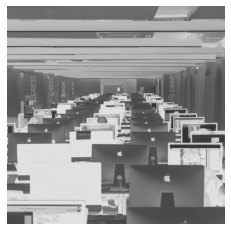

In [28]:
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
img = cv2.imread('/content/drive/MyDrive/School21/s21_color.png',cv2.IMREAD_GRAYSCALE)

#img = cv2.imread('s22_color.png') # Считываем картинку в img
#img_src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Переводим картинку в grayscale

print ("Исходное изображение:\n")
plt.imshow(img, cmap='gray') #Устанавливаем карту цветов для отображения картинки в matplotlib
plt.axis('off') #Отключаем отображение осей
plt.show() #Отображаем картинку

cv2.imwrite('/content/drive/MyDrive/School21/s212_color.png',img)
cv2.imwrite('invert_gray.png',img)  # Сохраняем картинку

kernel1 = np.array([[1/19, 1/19, 1/19], [1/19, 1/19, 1/19], [1/19, 1/19, 1/19]])
kernel2 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernel3 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel4 = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
kernel5 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
kernel6 = np.array([[1, 1, 1], [1, -20, 1], [1, 1, 1]])

img_rst1 = cv2.filter2D(img,-1,kernel1) # Накладываем на картинку 1 kernel
print ("Изображение после наложения первого кернела:\n")
plt.imshow(img_rst1, cmap='gray') #Устанавливаем карту цветов для отображения картинки в matplotlib
plt.axis('off') #Отключаем отображение осей
plt.show() #Отображаем картинку

img_rst2 = cv2.filter2D(img,-1,kernel2) # Накладываем на картинку 2 kernel
print ("Изображение после наложения второго кернела:\n")
plt.imshow(img_rst2, cmap='gray') #Устанавливаем карту цветов для отображения картинки в matplotlib
plt.axis('off') #Отключаем отображение осей
plt.show() #Отображаем картинку

img_rst3 = cv2.filter2D(img,-1,kernel3) # Накладываем на картинку 3 kernel
print ("Изображение после наложения третьего кернела:\n")
plt.imshow(img_rst3, cmap='gray') #Устанавливаем карту цветов для отображения картинки в matplotlib
plt.axis('off') #Отключаем отображение осей
plt.show() #Отображаем картинку

img_rst4 = cv2.filter2D(img,-1,kernel4) # Накладываем на картинку 4 kernel
print ("Изображение после наложения четвертого кернела:\n")
plt.imshow(img_rst4, cmap='gray') #Устанавливаем карту цветов для отображения картинки в matplotlib
plt.axis('off') #Отключаем отображение осей
plt.show() #Отображаем картинку

img_rst5 = cv2.filter2D(img,-1,kernel5) # Накладываем на картинку 5 kernel
print ("Изображение после наложения пятого кернела:\n")
plt.imshow(img_rst5, cmap='gray') #Устанавливаем карту цветов для отображения картинки в matplotlib
plt.axis('off') #Отключаем отображение осей
plt.show() #Отображаем картинку

# После наложения 6 кернела картинка должна инвертировать цвета, 
# для этого необходимо нормировать массив , разделив его на 255
img_rst6 = cv2.filter2D(img/255,-1,kernel6) # Накладываем на картинку 6 kernel
print ("Изображение после наложения шестого кернела:\n")
plt.imshow(img_rst6, cmap='gray') #Устанавливаем карту цветов для отображения картинки в matplotlib
plt.axis('off') #Отключаем отображение осей
plt.show() #Отображаем картинку


Проверка:
картинка после наложения 3 кернела должна визуализировать вертикальные линии
картинка после наложения 4 кернела должна визуализировать горизонтальные линии
картинка после наложения 6 кернела должна инвертировать цвета

Task 7 Используя алгоритм SVD, сократите размерность матрицы, описывающей изображение в черно-белом канале из предыдущего упражнения. В исходном виде изображение описывается матрицей 1707 на 1707. Попробуйте взять первый сингулярный вектор из разложения SVD, первые два, первые 5, первые 10, первые 50, первые 100.

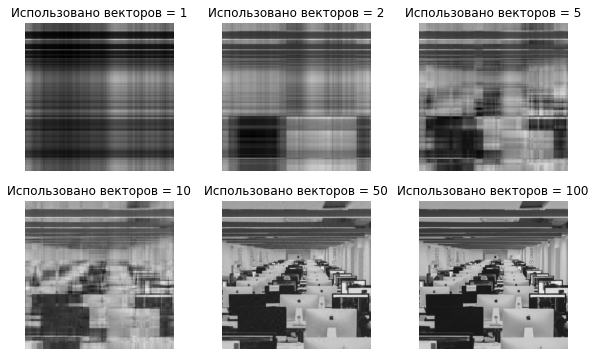

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
img = cv2.imread('/content/drive/MyDrive/School21/s21_color.png')
#img = cv2.imread('s21_color.png') # Считываем картинку в img
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Переводим картинку в grayscale
u, s, v = np.linalg.svd(gray_image, full_matrices=False) # Разложение по сингулярным значениям
 
comps = [1, 2, 5, 10, 50, 100] # Задаем кол-во векторов для отображения
plt.figure(figsize=(10, 6)) # Задаем размер отображаемых картинок
 
for i in range(len(comps)): # Создаем цикл для создания картинок с нужным кол-вом векторов
    low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ v[:comps[i], :] 
    #Собираем картинку из сингулярных значений с нужным кол-вом векторов
    plt.subplot(2, 3, i+1) # задаем ориентацию для картинок
    plt.imshow(low_rank, cmap='gray') #Устанавливаем карту цветов для отображения картинки в matplotlib
    plt.title(f'Использовано векторов = {comps[i]}') #Выводим подпись к картинке
    plt.axis('off') #Отключаем отображение осей